In [219]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Poisson
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import NegativeBinomial
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
from statsmodels.discrete.count_model import ZeroInflatedGeneralizedPoisson
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from statsmodels.miscmodels.count import PoissonZiGMLE
import statsmodels.api as sm
import seaborn as sns

In [237]:
efficacy_data=pd.read_csv(r"C:\Users\sreek\Documents\bayer\Scenario\efficacy.csv")
subject_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\subject.csv')
randomization_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\randomization.csv')
full_data=efficacy_data.set_index('subject').join(subject_data.set_index('subject'))\
.join(randomization_data.set_index('subject')).reset_index()


In [242]:
full_data.rename(columns={"eye.colour":"eye_colour","tissue.use":"tissue_use",\
                          "mucus.viscosity":"mucus_viscosity","previous.year":"previous_year","eye.colour":"eye_colour"},inplace=True)

full_data['country']=full_data['country'].astype('category')
full_data['country']=full_data['country'].cat.codes
full_data['tissue_use']=full_data['tissue_use'].astype('category')
full_data['tissue_use']=full_data['tissue_use'].cat.codes


In [239]:
full_data.drop(['eye_colour','subject'],axis=1,inplace=True)

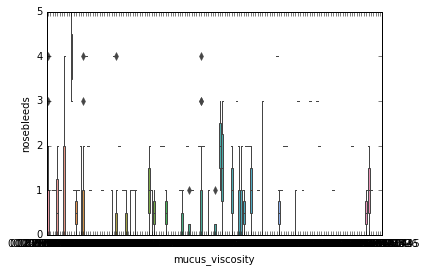

In [246]:
sns.boxplot(full_data.mucus_viscosity,full_data.nosebleeds)

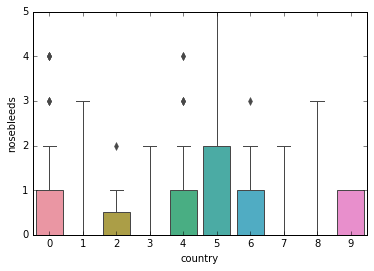

In [245]:
sns.boxplot(full_data.country,full_data.nosebleeds)

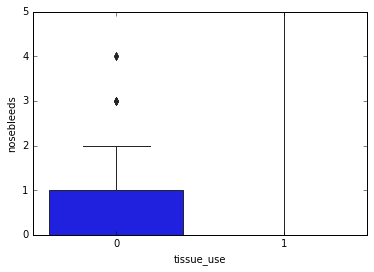

In [247]:
sns.boxplot(full_data.tissue_use,full_data.nosebleeds)

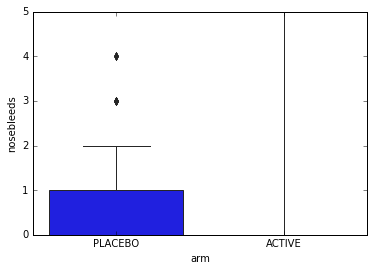

In [249]:
sns.boxplot(full_data.arm,full_data.nosebleeds)

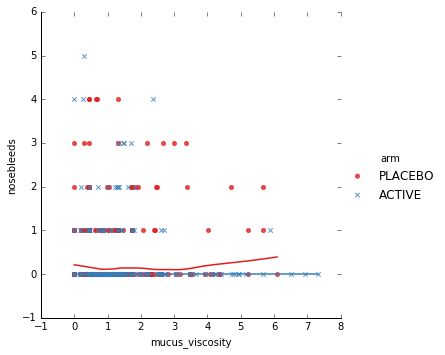

In [228]:
sns.lmplot(x='mucus_viscosity',y='nosebleeds',hue='arm',data=full_data,markers=["o", "x"],\
            palette="Set1",lowess=True)

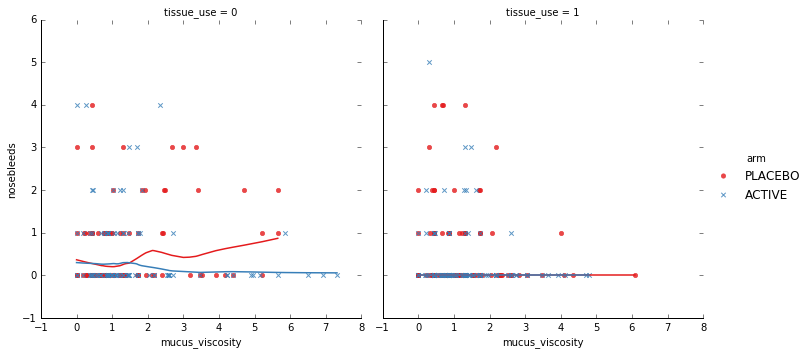

In [232]:
sns.lmplot(x='mucus_viscosity',y='nosebleeds',hue='arm',col='tissue_use',data=full_data,markers=["o", "x"],\
            palette="Set1",lowess=True)

C:\python\pyLibs\Anaconda\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


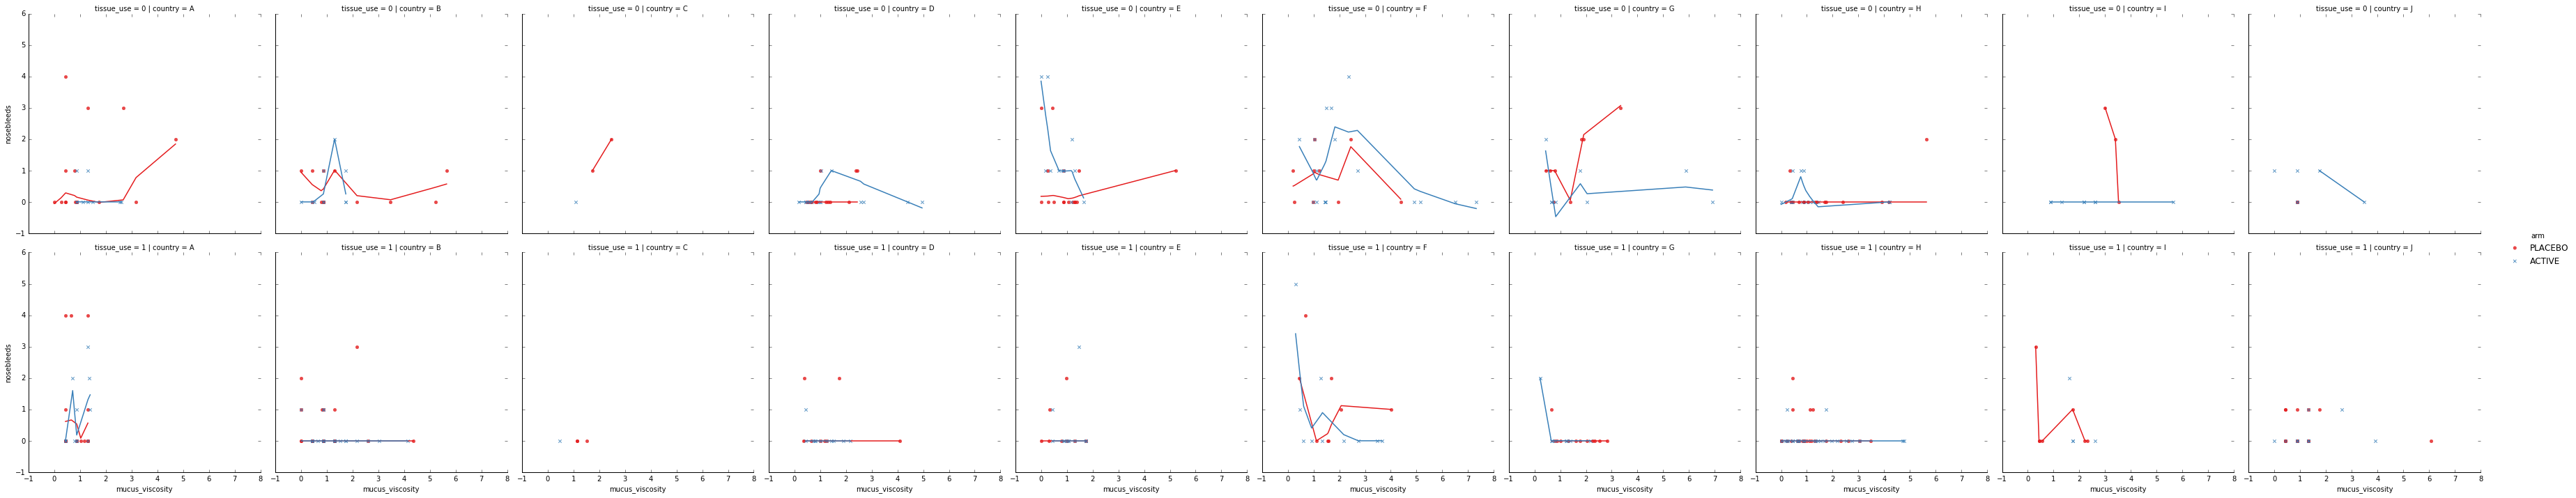

In [241]:
sns.lmplot(x='mucus_viscosity',y='nosebleeds',hue='arm',col='country',row='tissue_use',data=full_data,markers=["o", "x"],\
            palette="Set1",lowess=True)

In [214]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()
gee_pom=sm.GEE.from_formula("nosebleeds~mucus_viscosity+tissue_use+previous_year+country",groups=full_data.arm\
                          , data=full_data,cov_struct=ind, family=fam).fit()
print (gee_pom.summary())



                               GEE Regression Results                              
Dep. Variable:                  nosebleeds   No. Observations:                  443
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                 221
                      Estimating Equations   Max. cluster size:                 222
Family:                            Poisson   Mean cluster size:               221.5
Dependence structure:         Independence   Num. iterations:                     6
Date:                     Sun, 19 Aug 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         13:29:02
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4308      0.340     -4.211      0.000      -2.097     

In [186]:
ngbi=NegativeBinomial.from_formula("full_data.nosebleeds~full_data.mucus_viscosity+\
                     +full_data.tissue_use+full_data.country:full_data.previous_year+full_data.arm\
                     ",data=full_data
                     ).fit()
print(ngbi.summary())
print (ngbi.aic)

Optimization terminated successfully.
         Current function value: 0.879604
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
                      NegativeBinomial Regression Results                       
Dep. Variable:     full_data.nosebleeds   No. Observations:                  443
Model:                 NegativeBinomial   Df Residuals:                      438
Method:                             MLE   Df Model:                            4
Date:                  Sun, 19 Aug 2018   Pseudo R-squ.:                 0.01306
Time:                          10:37:16   Log-Likelihood:                -389.66
converged:                         True   LL-Null:                       -394.82
                                          LLR p-value:                   0.03547
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

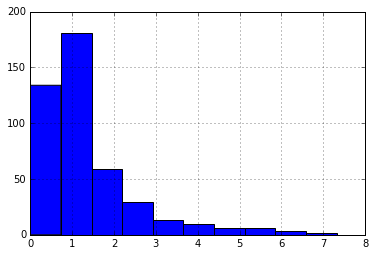

In [78]:
%matplotlib inline
full_data.mucus_viscosity.hist()

In [175]:
endg=full_data.nosebleeds
exg=full_data[full_data.columns.difference(['nosebleeds','arm'])]

In [216]:
zingp=ZeroInflatedGeneralizedPoisson.from_formula("full_data.nosebleeds~full_data.mucus_viscosity+full_data.tissue_use \
                             +full_data.country+full_data.previous_year+full_data.arm\
                             ",data=full_data).fit()
print (zingp.summary())
print("AIC:")
print (zingp.aic)

Optimization terminated successfully.
         Current function value: 0.863373
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
                    ZeroInflatedGeneralizedPoisson Regression Results                     
Dep. Variable:               full_data.nosebleeds   No. Observations:                  443
Model:             ZeroInflatedGeneralizedPoisson   Df Residuals:                      437
Method:                                       MLE   Df Model:                            5
Date:                            Sun, 19 Aug 2018   Pseudo R-squ.:                 0.03045
Time:                                    13:29:19   Log-Likelihood:                -382.47
converged:                                   True   LL-Null:                       -394.49
                                                    LLR p-value:                 0.0002148
                                coef    std err          z      P>|z|      [0.025      0.975]
------

In [111]:
full_data.drop(['subject'],axis=1,inplace=True)

In [149]:
from patsy import ModelDesc

In [155]:
desc = ModelDesc.from_formula("y ~ a + b + c + d+a*b")